<img src="https://devra.ai/analyst/notebook/2830/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">  <div style="font-size:150%; color:#FEE100"><b>CO2 Emissions Analysis & Prediction</b></div>  <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div></div>

## Table of Contents
- [Introduction](#Introduction)
- [Imports and Data Loading](#Imports-and-Data-Loading)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Predictive Modelling](#Predictive-Modelling)
- [Conclusions and Future Work](#Conclusions-and-Future-Work)

## Introduction

Our planet is a complex interplay of natural and human-induced processes. In this notebook, we are driven by the curiosity to see if we can unravel interesting insights from global CO2 emissions data, which spans multiple regions, sectors, and time frames. If you find this notebook useful, consider upvoting it.

We will start with loading and cleaning the data, move on to exploratory data analysis using various visualization techniques, and finally build a regression predictor for a key environmental metric.

In [1]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # For environments where a display is not available
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # If only plt is imported
%matplotlib inline

import seaborn as sns

# For predictive modelling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import permutation_importance

# Set plotting aesthetics
sns.set(style='whitegrid', context='notebook')

# Print a simple statement to confirm all libraries are imported
print('Libraries imported successfully.')

Libraries imported successfully.


In [2]:
# Load the dataset
data_path = '/kaggle/input/co-emissions-across-countries-regions-and-sectors/Data.csv'
df = pd.read_csv(data_path, encoding='UTF-8-SIG', delimiter=',')

# Display the first few rows to ensure the data loaded correctly
print('Data loaded. First few rows:')
print(df.head())

Data loaded. First few rows:
  Description         Name  year iso_code  population  gdp  cement_co2  \
0     Country  Afghanistan  1850      AFG   3752993.0  NaN         0.0   
1     Country  Afghanistan  1851      AFG   3767956.0  NaN         0.0   
2     Country  Afghanistan  1852      AFG   3783940.0  NaN         0.0   
3     Country  Afghanistan  1853      AFG   3800954.0  NaN         0.0   
4     Country  Afghanistan  1854      AFG   3818038.0  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  ...  share_global_other_co2  \
0                    0.0  NaN             NaN  ...                     NaN   
1                    0.0  NaN             NaN  ...                     NaN   
2                    0.0  NaN             NaN  ...                     NaN   
3                    0.0  NaN             NaN  ...                     NaN   
4                    0.0  NaN             NaN  ...                     NaN   

   share_of_temperature_change_from_ghg  temperature_chan

## Data Cleaning and Preprocessing

In this section, we check for missing values, incorrect data types and perform necessary transformations. The 'year' column represents calendar years and will be treated as numeric information reflective of time.

In [3]:
# Display info on data types
print('Initial Data Info:')
df.info()

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print('\nMissing values in each column:')
print(missing_values[missing_values > 0])

# For numerical columns, fill missing values with the median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# For object (categorical) columns, fill missing values with the mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify that missing values are handled
print('\nMissing values after cleaning:')
print(df.isnull().sum().sum())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43746 entries, 0 to 43745
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Description                                43746 non-null  object 
 1   Name                                       43746 non-null  object 
 2   year                                       43746 non-null  int64  
 3   iso_code                                   37921 non-null  object 
 4   population                                 37965 non-null  float64
 5   gdp                                        14989 non-null  float64
 6   cement_co2                                 23612 non-null  float64
 7   cement_co2_per_capita                      22715 non-null  float64
 8   co2                                        27059 non-null  float64
 9   co2_growth_abs                             24987 non-null  float64
 10  co2

## Exploratory Data Analysis

In our quest for insights, we use a variety of visualization techniques. The following plots include histograms, bar plots, pair plots and a correlation heatmap. Note that for the correlation heatmap we reduce the dataframe to only numeric values.

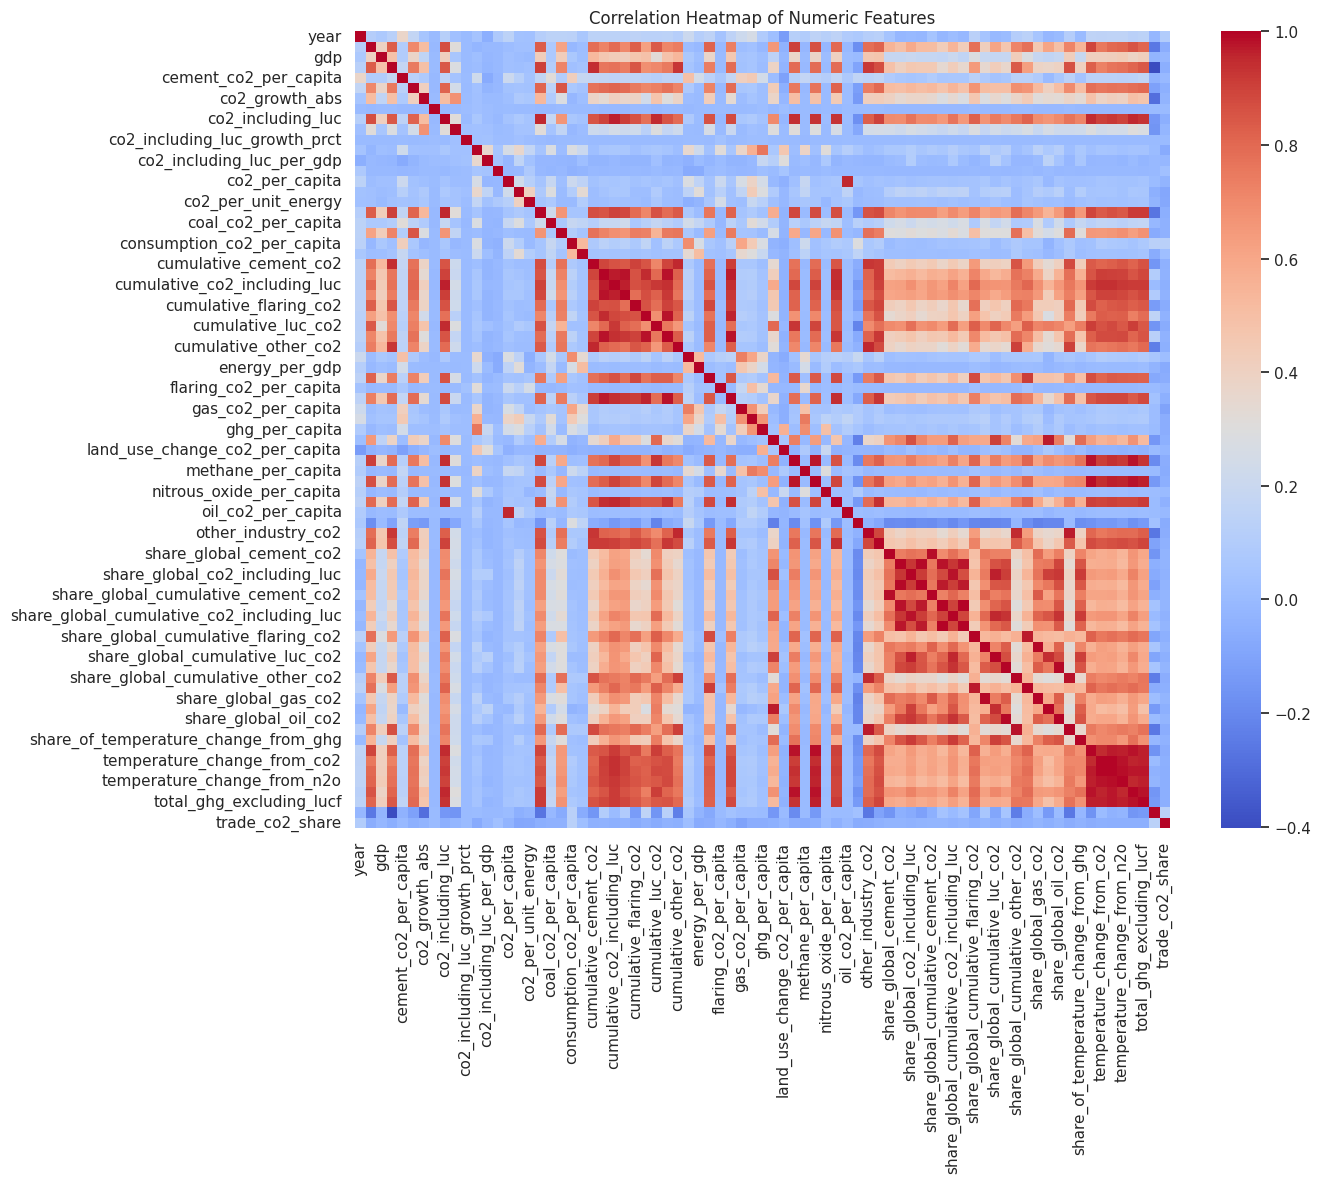

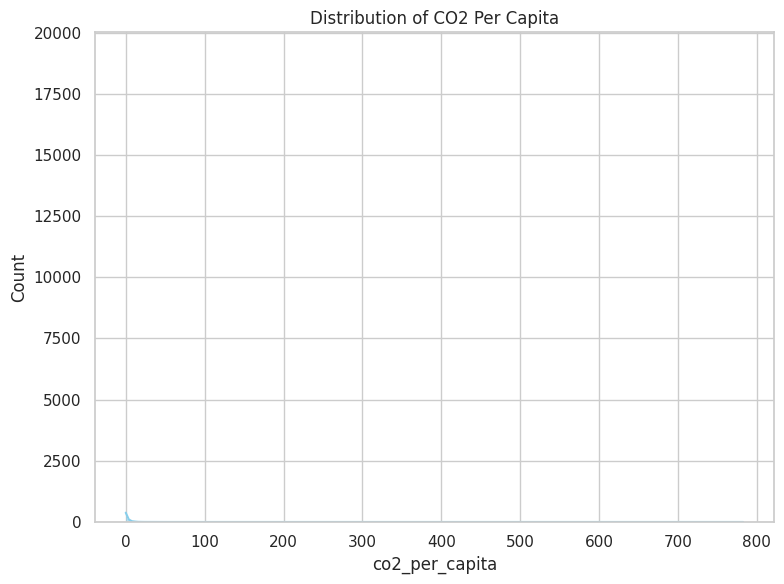

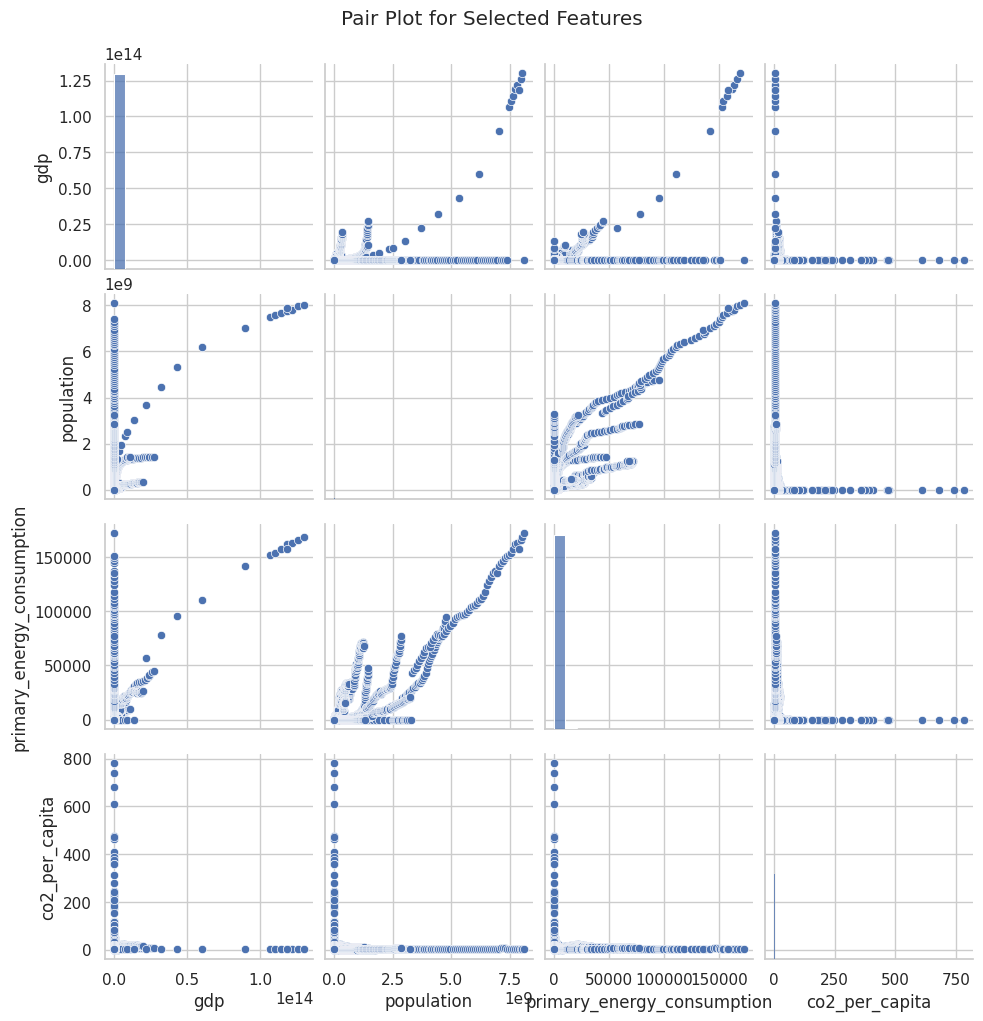

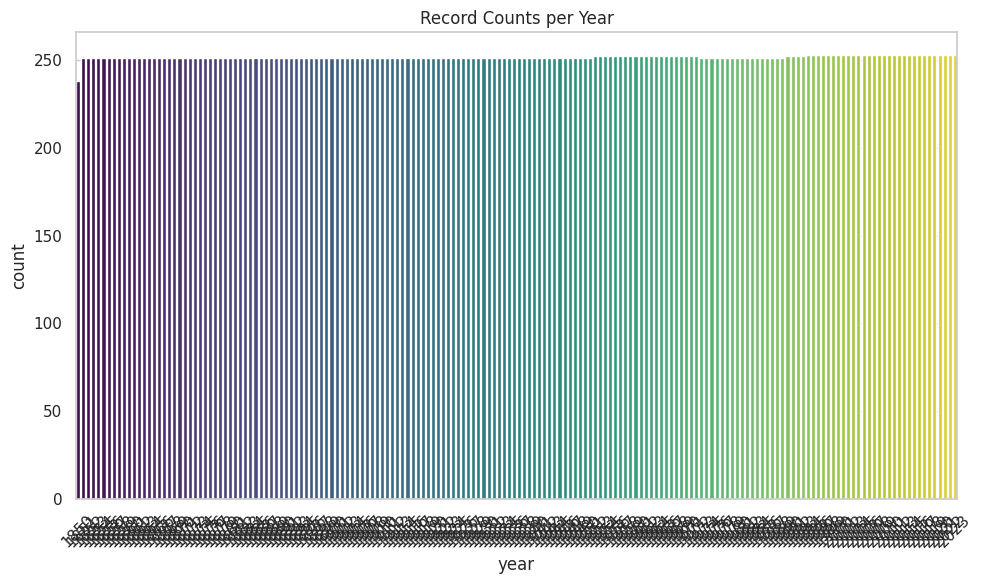

In [4]:
# Reduce the data frame to only numeric values for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap if there are four or more numeric columns
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(14, 12))
    sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False, fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.savefig('corr_heatmap.png')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

# Histogram for the target variable 'co2_per_capita'
plt.figure(figsize=(8, 6))
sns.histplot(df['co2_per_capita'], kde=True, color='skyblue')
plt.title('Distribution of CO2 Per Capita')
plt.tight_layout()
plt.savefig('hist_co2_per_capita.png')
plt.show()

# Pair Plot for a sample of numeric columns (choosing a subset for clarity)
cols_subset = ['gdp', 'population', 'primary_energy_consumption', 'co2_per_capita']
sns.pairplot(df[cols_subset].dropna())
plt.suptitle('Pair Plot for Selected Features', y=1.02)
plt.savefig('pairplot_selected.png')
plt.show()

# Count Plot (Pie Chart equivalent) of the number of records per 'year'
plt.figure(figsize=(10, 6))
order = sorted(df['year'].unique())
sns.countplot(data=df, x='year', order=order, palette='viridis')
plt.title('Record Counts per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('year_count.png')
plt.show()

## Predictive Modelling

Moving beyond descriptive statistics, our next step is to create a predictor for the target variable 'co2_per_capita'. We hypothesize that economic and energy consumption data can explain a significant portion of the variations in per capita CO2 emissions. In this analysis, we build a simple linear regression model using selected features.

Linear Regression R2 Score: 0.006
Linear Regression MSE: 89.903


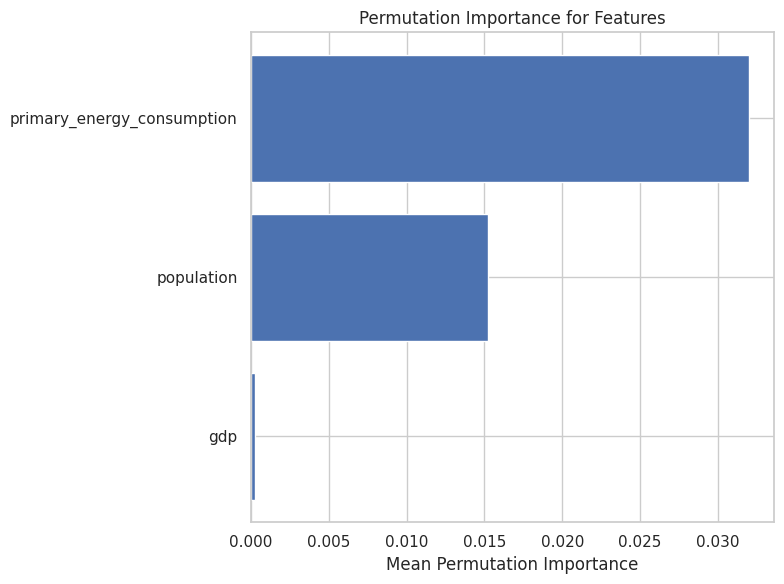

In [5]:
# For prediction, we select a subset of features that are likely to be informative
# We avoid using features that are derived directly from the target.
predictor_features = ['gdp', 'population', 'primary_energy_consumption']

# Check if all selected features are in the dataframe
for feature in predictor_features:
    if feature not in df.columns:
        raise ValueError(f"Selected feature '{feature}' is not present in the dataframe")

X = df[predictor_features]
y = df['co2_per_capita']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model using R2 score and mean squared error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression R2 Score: {r2:.3f}')
print(f'Linear Regression MSE: {mse:.3f}')

# Permutation Importance to assess feature contributions
perm_importance = permutation_importance(lr_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(predictor_features)[sorted_idx])
plt.xlabel('Mean Permutation Importance')
plt.title('Permutation Importance for Features')
plt.tight_layout()
plt.savefig('permutation_importance.png')
plt.show()

## Conclusions and Future Work

In this notebook, we conducted a thorough analysis of a comprehensive dataset on CO2 emissions across countries, regions, and sectors. We cleaned the data, visualized key aspects using diverse plot types, and built a simple linear regression predictor for per capita CO2 emissions based on selected economic and energy consumption features.

The merits of this approach include a systematic data processing workflow, the use of multiple visualization techniques to uncover hidden relationships, and the integration of predictive modelling to estimate environmental metrics. It is important to note that data quality, outliers, and potential multicollinearity can influence the predictive accuracy. Future analysis could include:

- Exploring other predictive algorithms such as Random Forests or Gradient Boosting Machines for potential improvements in accuracy.
- Utilizing a broader set of features and engineering new ones based on domain knowledge.
- Performing a deeper time series analysis to capture trends and cyclic patterns in the data.

We hope you have found this notebook engaging and insightful. If you did, an upvote would be much appreciated.